In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df=pd.read_csv('Zomato data .csv')
print(df.head())

                    name online_order book_table   rate  votes  \
0                  Jalsa          Yes        Yes  4.1/5    775   
1         Spice Elephant          Yes         No  4.1/5    787   
2        San Churro Cafe          Yes         No  3.8/5    918   
3  Addhuri Udupi Bhojana           No         No  3.7/5     88   
4          Grand Village           No         No  3.8/5    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [10]:
def handlerate(value):
  rate=str(value).split('/')
  value=value[0];
  return float(value)

df['rate']=df['rate'].apply(handlerate)
print(df.head)

<bound method NDFrame.head of                       name online_order book_table  rate  votes  \
0                    Jalsa          Yes        Yes   4.0    775   
1           Spice Elephant          Yes         No   4.0    787   
2          San Churro Cafe          Yes         No   3.0    918   
3    Addhuri Udupi Bhojana           No         No   3.0     88   
4            Grand Village           No         No   3.0    166   
..                     ...          ...        ...   ...    ...   
143       Melting Melodies           No         No   3.0      0   
144        New Indraprasta           No         No   3.0      0   
145           Anna Kuteera          Yes         No   4.0    771   
146                 Darbar           No         No   3.0     98   
147          Vijayalakshmi          Yes         No   3.0     47   

     approx_cost(for two people) listed_in(type)  
0                            800          Buffet  
1                            800          Buffet  
2           

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


Text(0.5, 0, 'Types of Restaurants')

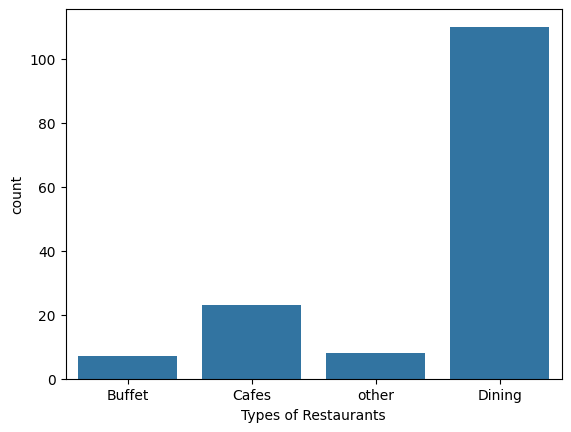

In [6]:
sns.countplot(x=df['listed_in(type)'])
plt.xlabel('Types of Restaurants')

In [7]:
#Majority of restaurants fall in dining category

Text(0, 0.5, 'Votes')

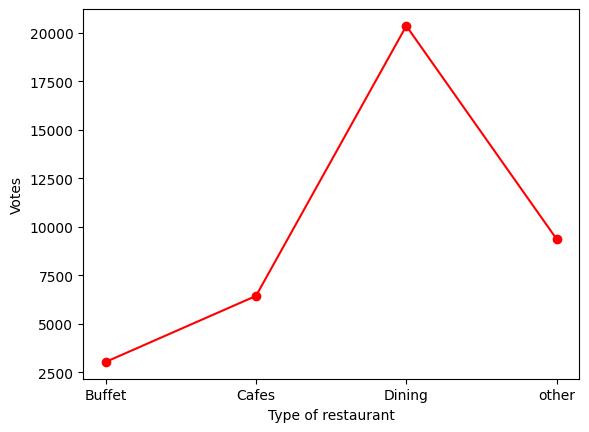

In [9]:
grouped_data=df.groupby(['listed_in(type)'])['votes'].sum()
result=pd.DataFrame({'votes':grouped_data})
plt.plot(result,c='red',marker='o')
plt.xlabel('Type of restaurant')
plt.ylabel('Votes')

In [10]:
#Dining restaurants are preferred by the majority

In [12]:
maxvotes=df['votes'].max()
restaurantswithmaxvotes=df.loc[df['votes']==maxvotes,'name']
print("Restaurant with maximum votes:",restaurantswithmaxvotes)

Restaurant with maximum votes: 38    Empire Restaurant
Name: name, dtype: object


In [13]:
#Empire restaurant is the most favoured

<Axes: xlabel='online_order', ylabel='count'>

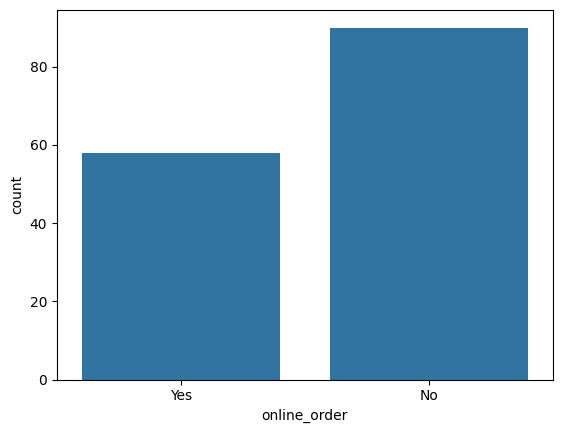

In [15]:
sns.countplot(x=df['online_order'])

In [16]:
#Majority of the restaurants do not accept online orders

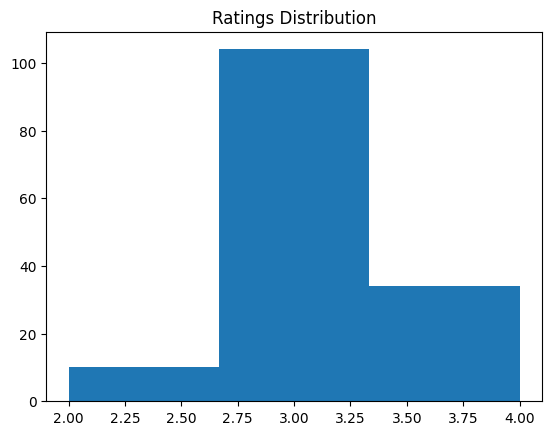

In [21]:
plt.hist(df['rate'],bins=3)
plt.title('Ratings Distribution')
plt.show()

In [22]:
#Majority of restaurants received rating between 2.5 and 3.5

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

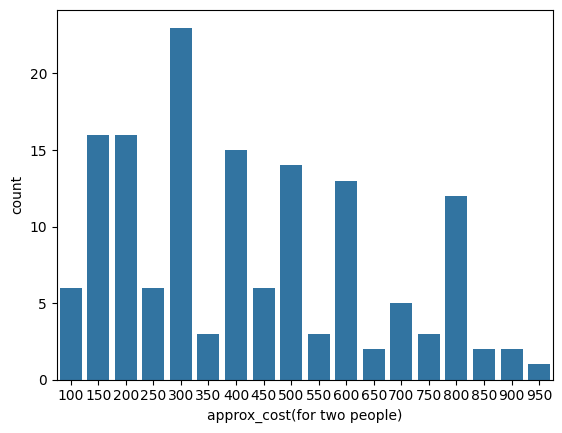

In [23]:
couple_data=df['approx_cost(for two people)']
sns.countplot(x=couple_data)

In [24]:
#Majority of restaurants prefer restaurants with an approximate cost of 300 rupees

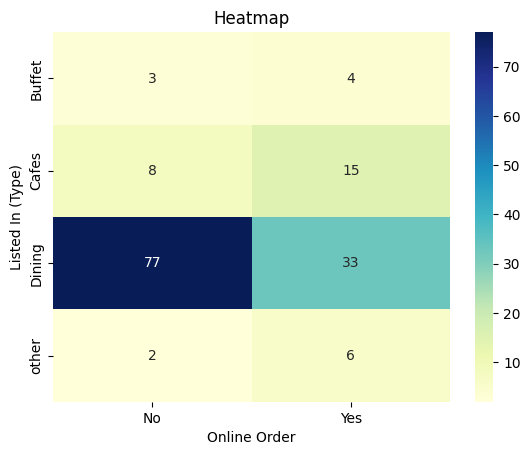

In [28]:
pivot_table = df.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt='d')
plt.title("Heatmap")
plt.xlabel("Online Order")
plt.ylabel("Listed In (Type)")
plt.show()


In [ ]:
#Cafes primarily receive online orders whereas restaurants face more demand for offline orders